In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import shap
import matplotlib.pyplot as plt
import numpy as np

c:\Users\jhama\anaconda3\envs\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
train_data = pd.read_csv("customer_churn_dataset-training-master.csv")
test_data = pd.read_csv("customer_churn_dataset-testing-master.csv")

In [4]:
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
train_data[numerical_cols] = train_data[numerical_cols].fillna(train_data[numerical_cols].median())

categorical_cols = train_data.select_dtypes(include=['object']).columns
train_data[categorical_cols] = train_data[categorical_cols].fillna(train_data[categorical_cols].mode().iloc[0])

In [5]:
label_encoder = LabelEncoder()
for col in categorical_cols:
    train_data[col] = label_encoder.fit_transform(train_data[col])

In [6]:
y = train_data['Churn']
X = train_data.drop(columns=['CustomerID', 'Churn'])

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)
svm_rbf.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [9]:
y_val_pred = svm_rbf.predict(X_val)

In [ ]:
import pickle
with open('model.pkl', 'rb') as f:
    svm_rbf = pickle.load(f)

In [10]:
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
print("Validation Set Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Validation Set Metrics:
Accuracy: 0.60
Precision: 0.59
Recall: 1.00
F1 Score: 0.74


In [11]:
test_data[numerical_cols] = test_data[numerical_cols].fillna(test_data[numerical_cols].median())
test_data[categorical_cols] = test_data[categorical_cols].fillna(test_data[categorical_cols].mode().iloc[0])
for col in categorical_cols:
    test_data[col] = label_encoder.fit_transform(test_data[col])

y_test = test_data['Churn']
X_test = test_data.drop(columns=['CustomerID', 'Churn'])
X_test_scaled = scaler.transform(X_test)

# Make predictions on the test set
y_test_pred = svm_rbf.predict(X_test_scaled)

# Generate classification report for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
print("\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")


Test Set Metrics:
Accuracy: 0.48
Precision: 0.47
Recall: 1.00
F1 Score: 0.64


In [12]:
explainer = shap.KernelExplainer(svm_rbf.predict, X_train[:100])

In [13]:
shap_values = explainer.shap_values(X_test_scaled[:100])

100%|██████████| 100/100 [1:57:33<00:00, 70.54s/it]  


In [52]:
feature_names = ['Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction']

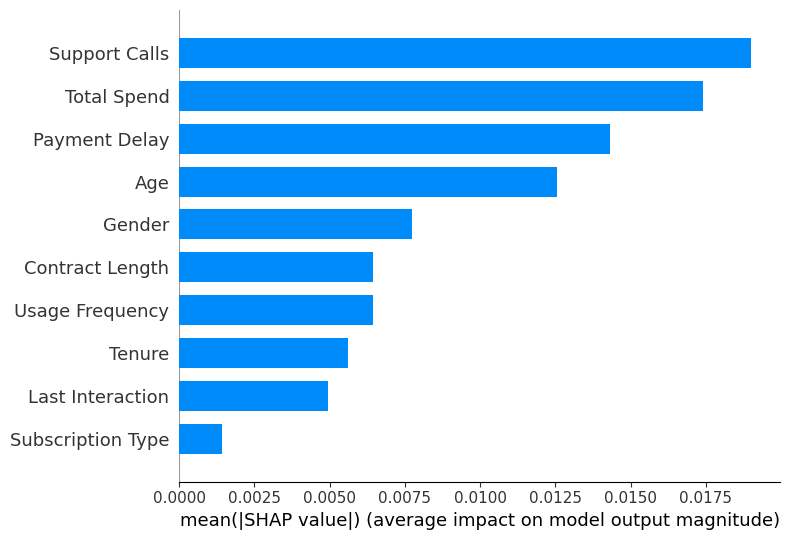

In [54]:
shap.summary_plot(shap_values, X_test_scaled[:100], plot_type="bar", feature_names=feature_names)

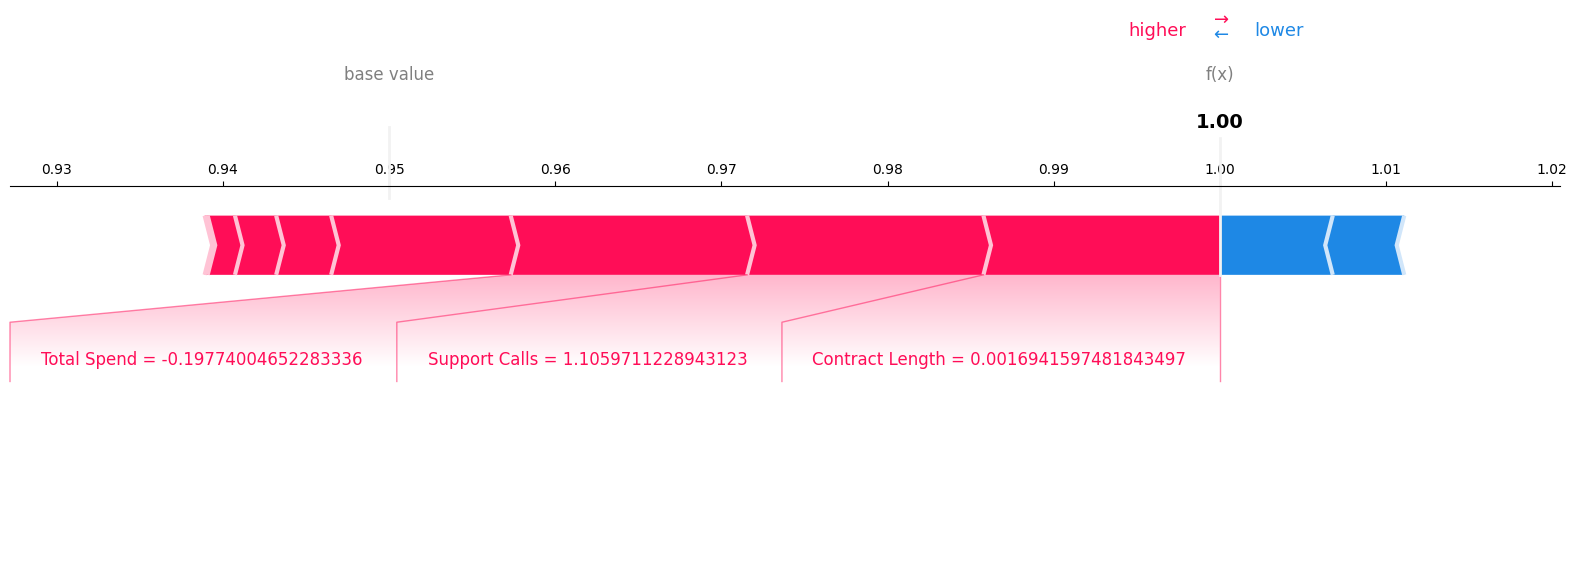

In [65]:
shap.force_plot(explainer.expected_value, shap_values[1], X_test_scaled[1], feature_names=feature_names, matplotlib=True, figsize=(20, 5), contribution_threshold=0.25)